# Affine Transformation 


### Resources

* implementation of affine transformation in cv2: https://www.youtube.com/watch?v=Ad9e5eoHm9U

* affine transformation linear algebra: http://mathworld.wolfram.com/AffineTransformation.html

* affine transformation of coordinates in 2D: 
https://medium.com/hipster-color-science/computing-2d-affine-transformations-using-only-matrix-multiplication-2ccb31b52181

### Introduction to Affine Transformation

Affine transformation is a linear mapping method that preserves points, straight lines, and planes. Sets of parallel lines remain parallel after an affine transformation. The affine transformation technique is typically used to correct for geometric distortions or deformations that occur with non-ideal camera angles.

In simpler terms, what we are doing here is ....

<img src="affine_transformation.png">

### Linear Algebra Behind Affine Transformation 

In [1]:
#### TO DO

### CV2 Implementation of Affine Transformation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

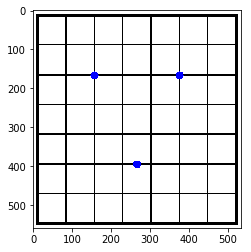

In [3]:
img = cv2.imread("grid.jpg")
rows, cols, ch = img.shape

affine_to_1 = (157, 167)
affine_to_2 = (375, 167)
affine_to_3 = (266, 395)

affine_to = [affine_to_1,affine_to_2,affine_to_3]


cv2.circle(img, affine_to_1, 10, (0, 0, 255), -1)
cv2.circle(img, affine_to_2, 10, (0, 0, 255), -1)
cv2.circle(img, affine_to_3, 10, (0, 0, 255), -1)

plt.imshow(img);

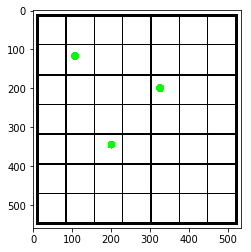

In [4]:
img_2 = cv2.imread("grid.jpg")
rows, cols, ch = img.shape

affine_from_1 = (107, 117)
affine_from_2 = (325, 200)
affine_from_3 = (200, 345)

affine_from = [affine_from_1,affine_from_2,affine_from_3]

cv2.circle(img_2, affine_from_1, 10, (0, 255, 0), -1)
cv2.circle(img_2, affine_from_2, 10, (0, 255, 0), -1)
cv2.circle(img_2, affine_from_3, 10, (0, 255, 0), -1)

plt.imshow(img_2);

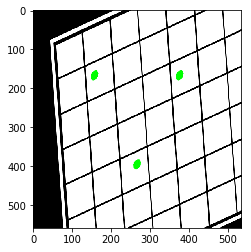

In [5]:
matrix = cv2.getAffineTransform(np.float32(affine_from), np.float32(affine_to))
result = cv2.warpAffine(img_2, matrix, (cols, rows))

plt.imshow(result);

### Affine Transform Coordinates

It is important that we no how to affine transform our coordinate set. If we have a pre determined set of coordinates (or facial landmarks) we need to know what these coordinates are after our images has been affine transformed - so the coordinates (or priciniple components of our coordinates) can be fed into our algorithm at a later point.  

In [6]:
# transformation matrix

In [7]:
x = np.float32(affine_from)
y = np.ones((3,1))

test = np.append(x,y,axis=1)

In [8]:
np.matmul(matrix, test.T).T

array([[157., 167.],
       [375., 167.],
       [266., 395.]])

In [9]:
np.isclose(np.matmul(matrix, test.T).T, np.float32(affine_to))

array([[ True,  True],
       [ True,  True],
       [ True,  True]])